<a href="https://colab.research.google.com/github/PhonxayMax/Understanding-Deep-Learning/blob/main/CH3_CH7_7_2_4_modeling_logic_gates_with_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [50]:
from google.colab import drive
drive.mount('/content/UnderstandingDL_Simon_J_D_Prince')

Drive already mounted at /content/UnderstandingDL_Simon_J_D_Prince; to attempt to forcibly remount, call drive.mount("/content/UnderstandingDL_Simon_J_D_Prince", force_remount=True).


In [51]:
%run UnderstandingDL_Simon_J_D_Prince/MyDrive/UnderstandingDL_Simon_J_D_Prince/CH3_perceptron_CH7_7_2_3_perceptron.ipynb

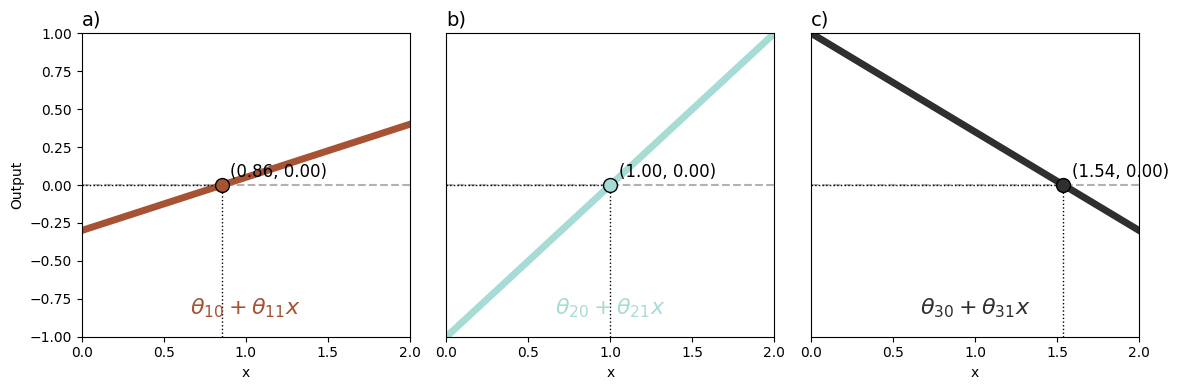

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Guessed parameters from the image
theta_10, theta_11 = -0.3, 0.35
theta_20, theta_21 = -1.0, 1.0
theta_30, theta_31 = 1.0, -0.65

# Input range
x = np.arange(0, 2.01, 0.01)

# Output functions
y1 = theta_10 + theta_11 * x
y2 = theta_20 + theta_21 * x
y3 = theta_30 + theta_31 * x

# Colors from figure
colors = ['#A75233', '#A6DCD5', '#2F2F2F']

# Calculate x-intercepts
x_intercepts = [
    -theta_10 / theta_11,
    -theta_20 / theta_21,
    -theta_30 / theta_31
]
y0 = 0  # intersection y value

# Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
titles = ['a)', 'b)', 'c)']
equations = [
    r"$\theta_{10} + \theta_{11}x$",
    r"$\theta_{20} + \theta_{21}x$",
    r"$\theta_{30} + \theta_{31}x$"
]
ys = [y1, y2, y3]

for i in range(3):
    xi = x_intercepts[i]
    axs[i].plot(x, ys[i], color=colors[i], linewidth=5)
    axs[i].axhline(y=0, linestyle='--', color='gray', alpha=0.6, linewidth=1.5)

    # Mark the intersection point
    axs[i].scatter(xi, y0, color=colors[i], s=100, edgecolors='black', zorder=5)

    # Guide lines
    axs[i].plot([xi, xi], [-1.0, y0], linestyle=':', color='black', linewidth=1)
    axs[i].plot([0, xi], [y0, y0], linestyle=':', color='black', linewidth=1)

    # Label the point
    axs[i].text(xi + 0.05, y0 + 0.05, f"({xi:.2f}, {y0:.2f})", fontsize=12, color='black')

    axs[i].set_xlim(0, 2.0)
    axs[i].set_ylim(-1.0, 1.0)
    axs[i].set_title(titles[i], loc='left', fontsize=14)
    axs[i].set_xlabel("x")
    axs[i].text(1.0, -0.85, equations[i], fontsize=16, color=colors[i], ha='center')

    if i == 0:
        axs[i].set_ylabel("Output")
    else:
        axs[i].set_yticks([])

plt.tight_layout()
plt.show()


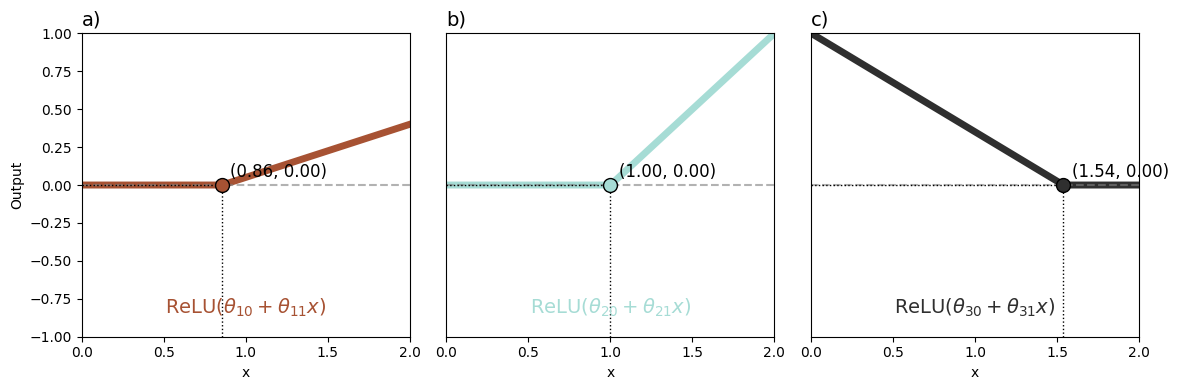

In [64]:
# Input
x_np = np.arange(0, 2.01, 0.01).reshape(-1, 1)
x = torch.tensor(x_np, dtype=torch.float32)

# Guessed theta values
thetas = [
    (-0.3, 0.35),
    (-1.0, 1.0),
    (1.0, -0.65)
]

colors = ['#A75233', '#A6DCD5', '#2F2F2F']
titles = ['a)', 'b)', 'c)']
equations = [
    r"$\text{ReLU}(\theta_{10} + \theta_{11}x)$",
    r"$\text{ReLU}(\theta_{20} + \theta_{21}x)$",
    r"$\text{ReLU}(\theta_{30} + \theta_{31}x)$"
]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    theta_0, theta_1 = thetas[i]
    W = torch.tensor([[theta_1]], dtype=torch.float32)
    b = torch.tensor([theta_0], dtype=torch.float32)

    y = Perceptron(x, W, b, activation=torch.relu).squeeze().numpy()
    xi = -theta_0 / theta_1
    yi = 0

    axs[i].plot(x_np, y, color=colors[i], linewidth=5)
    axs[i].axhline(y=0, linestyle='--', color='gray', alpha=0.6, linewidth=1.5)
    axs[i].plot([xi, xi], [-1, yi], linestyle=':', color='black', linewidth=1)
    axs[i].plot([0, xi], [yi, yi], linestyle=':', color='black', linewidth=1)
    axs[i].scatter(xi, yi, color=colors[i], s=100, edgecolors='black', zorder=5)
    axs[i].text(xi + 0.05, yi + 0.05, f"({xi:.2f}, {yi:.2f})", fontsize=12, color='black')

    axs[i].set_xlim(0, 2.0)
    axs[i].set_ylim(-1.0, 1.0)
    axs[i].set_title(titles[i], loc='left', fontsize=14)
    axs[i].set_xlabel("x")
    axs[i].text(1.0, -0.85, equations[i], fontsize=14, color=colors[i], ha='center')

    # ✅ Vertical ticks and label only on the first subplot
    if i == 0:
        axs[i].set_ylabel("Output")
    else:
        axs[i].set_yticks([])

plt.tight_layout()
plt.show()


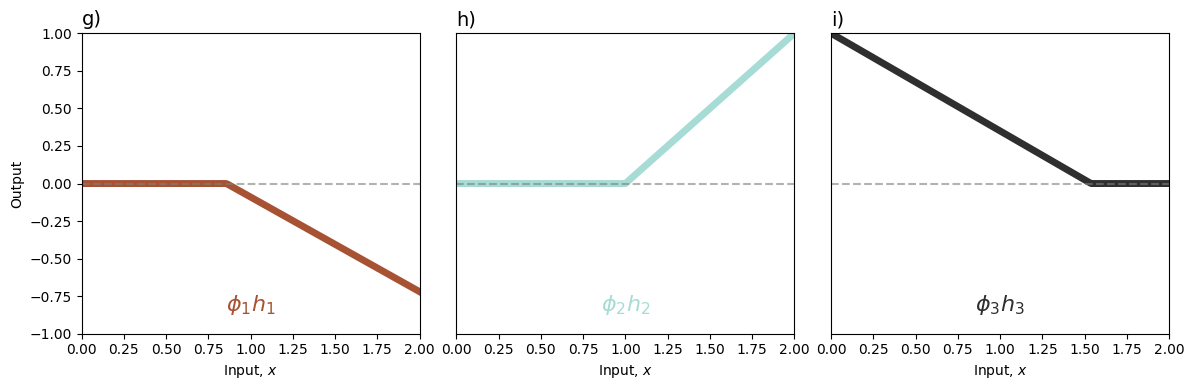

In [61]:

# Input
x_np = np.arange(0, 2.01, 0.01).reshape(-1, 1)
x = torch.tensor(x_np, dtype=torch.float32)

# Guessed θ values
thetas = [
    (-0.3, 0.35),
    (-1.0, 1.0),
    (1.0, -0.65)
]

# Corrected φ values
phis = [-1.8, 1.0, 1.0]

# Styles
colors = ['#A75233', '#A6DCD5', '#2F2F2F']
titles = ['g)', 'h)', 'i)']
equations = [
    r"$\phi_1 h_1$",
    r"$\phi_2 h_2$",
    r"$\phi_3 h_3$"
]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    theta_0, theta_1 = thetas[i]
    phi = phis[i]

    # Compute weighted ReLU
    W = torch.tensor([[theta_1]], dtype=torch.float32)
    b = torch.tensor([theta_0], dtype=torch.float32)
    h_i = Perceptron(x, W, b, activation=torch.relu).squeeze().numpy()
    y = phi * h_i

    axs[i].plot(x_np, y, color=colors[i], linewidth=5)
    axs[i].axhline(y=0, linestyle='--', color='gray', alpha=0.6, linewidth=1.5)

    axs[i].set_xlim(0, 2.0)
    axs[i].set_ylim(-1.0, 1.0)
    axs[i].set_xlabel("Input, $x$")
    axs[i].set_title(titles[i], loc='left', fontsize=14)
    axs[i].text(1.0, -0.85, equations[i], fontsize=16, color=colors[i], ha='center')

    # Vertical ticks and label only on first plot
    if i == 0:
        axs[i].set_ylabel("Output")
    else:
        axs[i].set_yticks([])

plt.tight_layout()
plt.show()


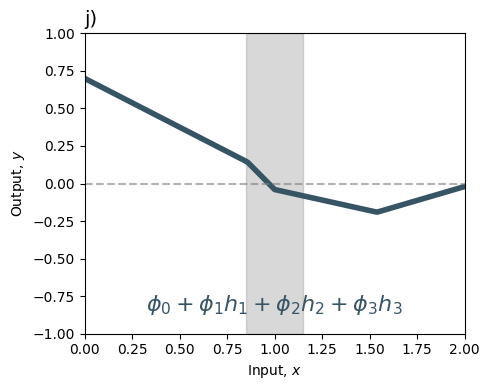

In [67]:


# Input
x_np = np.arange(0, 2.01, 0.01).reshape(-1, 1)
x = torch.tensor(x_np, dtype=torch.float32)

# θ and φ values (guessed)
thetas = [
    (-0.3, 0.35),
    (-1.0, 1.0),
    (1.0, -0.65)
]

phis = [-1.8, 1.0, 1.0]
phi_0 = -0.3  # final offset/bias (estimated from image)

# Compute each ReLU activation h_i(x)
outputs = []
for theta_0, theta_1 in thetas:
    W = torch.tensor([[theta_1]], dtype=torch.float32)
    b = torch.tensor([theta_0], dtype=torch.float32)
    h_i = Perceptron(x, W, b, activation=torch.relu).squeeze().numpy()
    outputs.append(h_i)

# Sum them up with φ weights + φ₀ bias
y_sum = phi_0 + sum(phi * h for phi, h in zip(phis, outputs))

# Plot
fig, ax = plt.subplots(figsize=(5, 4))

# Final output line
ax.plot(x_np, y_sum, color='#375465', linewidth=4)

# Gray band around x ≈ 1.0
ax.axvspan(0.85, 1.15, color='gray', alpha=0.3)

# Dashed horizontal at y = 0
ax.axhline(y=0, linestyle='--', color='gray', alpha=0.6, linewidth=1.5)

# Axis limits
ax.set_xlim(0, 2.0)
ax.set_ylim(-1.0, 1.0)

# Labels and title
ax.set_title("j)", loc='left', fontsize=14)
ax.set_xlabel("Input, $x$")
ax.set_ylabel("Output, $y$")
ax.text(1.0, -0.85, r"$\phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3$", fontsize=16,
        color='#375465', ha='center')

plt.tight_layout()
plt.show()
